<a href="https://colab.research.google.com/github/nithishareddy/CAP5610-HW1/blob/main/ML_HW3_Nithisha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

File already exists.Deleting the file...
File deleted.
Please upload your train.csv file now.


Saving train.csv to train.csv
File already exists.Deleting the file...
File deleted.
Please upload your test.csv file now.


Saving test.csv to test.csv


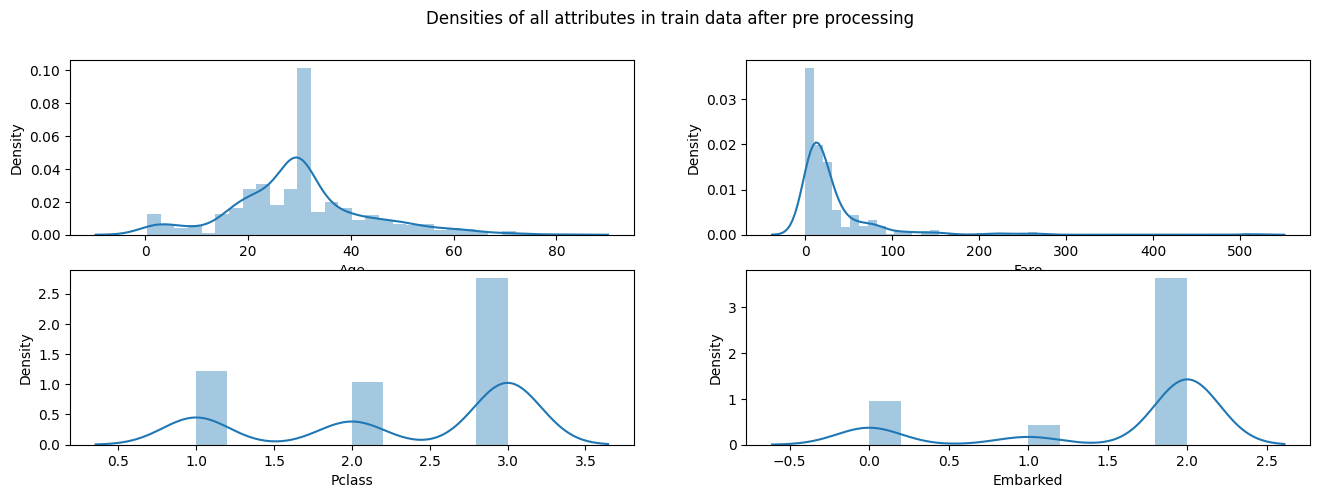

feature imp is:  [0.1251551  0.36617132 0.20044831 0.03153336 0.01770529 0.23700453
 0.02198209]
average accuracy using decision tree modeling is :: 80.8097420124286


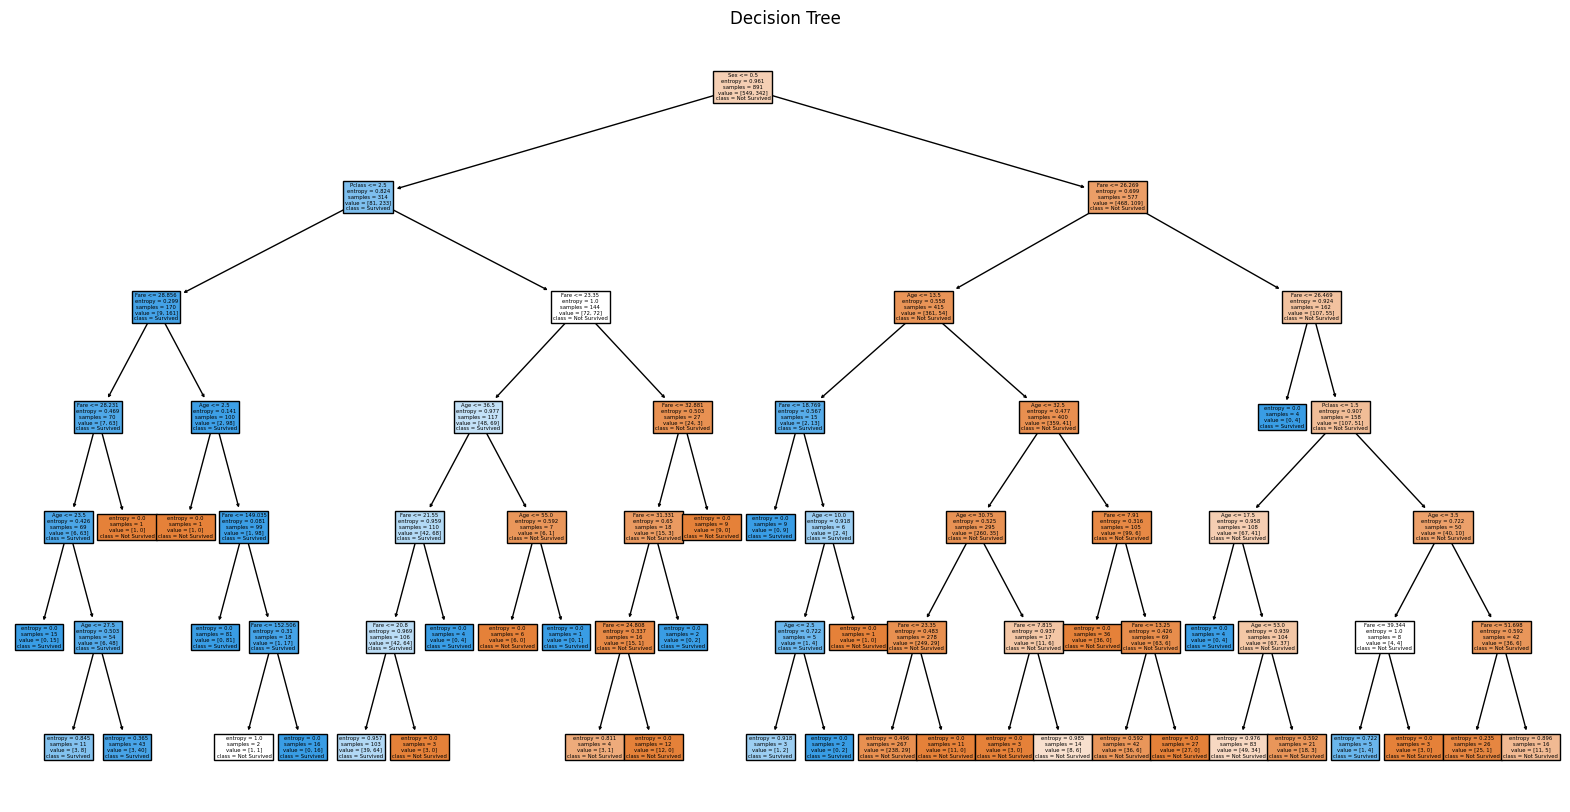

In [ ]:
import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import KFold

def selectFeatureImportancesForDT(decision_tree , X,Y):
    decision_tree.fit(X,Y)
    feature_importances_dt = decision_tree.feature_importances_
    print("feature imp is: ",feature_importances_dt)
    selected_features_dt = X.columns[feature_importances_dt>0.05]
    return selected_features_dt


def avgFiveFoldCrossValidation(best_decision_tree,X_selected,Y):
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    # Perform five-fold cross-validation
    cross_val_scores = cross_val_score(best_decision_tree, X_selected, Y, cv=cv,scoring='accuracy')

    # Calculate the average classification accuracy
    average_accuracy = cross_val_scores.mean()
    return average_accuracy*100


#code to upload csv file to colab local files.
from google.colab import files
import os
path = '/content/train.csv'
isFileExist = os.path.exists(path)
if isFileExist:
  print("File already exists.Deleting the file...")
  !rm train.csv
  print("File deleted.")
print("Please upload your train.csv file now.")
uploadedList = files.upload() # this will prompt you to upload the csv file.
#Please upload the file when asked in the command prompt so that the execution can proceed.


# Reading the given csv file data
train_data = pd.read_csv(io.BytesIO(uploadedList['train.csv']))

#code to upload csv file to colab local files.
from google.colab import files
import os
path = '/content/test.csv'
isFileExist = os.path.exists(path)
if isFileExist:
  print("File already exists.Deleting the file...")
  !rm test.csv
  print("File deleted.")
print("Please upload your test.csv file now.")
uploadedList = files.upload() # this will prompt you to upload the csv file.
#Please upload the file when asked in the command prompt so that the execution can proceed.


# Reading the given csv file data
test_data = pd.read_csv(io.BytesIO(uploadedList['test.csv']))

# Reading the given csv file data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


#pre processing the data
label_encoder = LabelEncoder() # Encode variables with characters
train_data["Sex"] = label_encoder.fit_transform(train_data["Sex"])
train_data["Embarked"].fillna(train_data["Embarked"].mode()[0], inplace=True) # replace null values of embarked field with mode
train_data["Fare"].fillna(train_data["Fare"].mean(), inplace=True)
train_data["Embarked"] = label_encoder.fit_transform(train_data["Embarked"])
test_data["Sex"] = label_encoder.fit_transform(test_data["Sex"])
test_data["Embarked"].fillna(test_data["Embarked"].mode()[0], inplace=True) # replace null values of embarked field with mode
test_data["Embarked"] = label_encoder.fit_transform(test_data["Embarked"])
test_data["Fare"].fillna(test_data["Fare"].mean(), inplace=True)

#replace null values of age with its mean
mean_age = train_data["Age"].mean()
train_data["Age"].fillna(mean_age, inplace=True)
test_data["Age"].fillna(test_data["Age"].mean(), inplace=True)
# Split the data into features (X) and target (y)
train_X = train_data[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
train_Y = train_data["Survived"]
test_X = test_data[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]


# Create a decision tree model
decision_tree = DecisionTreeClassifier(max_depth=8,criterion="entropy")

#plot the densities for all attributes in train data after pre processing
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(2,2,1)
sns.distplot(train_data['Age'])
plt.subplot(2,2,2)
sns.distplot(train_data['Fare'])
plt.subplot(2,2,3)
sns.distplot(train_data['Pclass'])
plt.subplot(2,2,4)
sns.distplot(train_data['Embarked'])
plt.suptitle("Densities of all attributes in train data after pre processing")
plt.show()

#Selecting features
selected_features_dt = selectFeatureImportancesForDT(decision_tree,train_X,train_Y)
X_selected_dt = X[selected_features_dt]
test_X_selected = test_X[selected_features_dt]

# Hyperparametr tuning by grid search
param_grid = {
    "max_depth": [2,4,6,8,10]
    }

grid_search = GridSearchCV(decision_tree, param_grid, cv=5)
grid_search.fit(X_selected_dt, train_Y)

best_decision_tree = grid_search.best_estimator_ #to get the best decision tree model

# Perform five-fold cross-validation
avg_accuracy = avgFiveFoldCrossValidation(best_decision_tree,X_selected_dt,train_Y)

#print average accuracy for decision tree
print('average accuracy using decision tree modeling is ::',avg_accuracy)



# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(best_decision_tree, filled=True, feature_names=X_selected_dt.columns, class_names=["Not Survived", "Survived"])
plt.title('Decision Tree')
plt.show()



In [ ]:
print(best_decision_tree.predict(test_X_selected)) # printing the predicted values for test data


[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier
rf = RandomForestClassifier()
# Fit the random search object to the data
rf.fit(X_selected_dt, train_Y)

# Perform five-fold cross-validation
cv = KFold(n_splits=5, random_state=1, shuffle=True)
cross_val_scores_rf = cross_val_score(rf, X_selected_dt, train_Y, cv=cv,scoring='accuracy')

# Calculate the average classification accuracy
average_accuracy_rf = cross_val_scores_rf.mean()

print("Average Classification Accuracy (Random Forest): {:.2f}%".format(average_accuracy_rf * 100))


Average Classification Accuracy (Random Forest): 82.38%


In [ ]:
print(rf.predict(test_X_selected)) # printing the predicted values for test data


[0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 1 0 1 0 0 0]


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder



# Create a base estimator (Decision Tree)
base_estimator = DecisionTreeClassifier(max_depth=3)

# Create a BaggingClassifier
bagging_classifier = BaggingClassifier(estimator=base_estimator, n_estimators=100, random_state=42).fit(train_X,train_Y)

# Perform five-fold cross-validation
cv = KFold(n_splits=5, random_state=1, shuffle=True)
cross_val_scores_bagging = cross_val_score(bagging_classifier, train_X, train_Y, cv=cv,scoring='accuracy')

# Calculate the average classification accuracy
average_accuracy_bagging = cross_val_scores_bagging.mean()
print("Average Classification Accuracy (Bagging): {:.2f}%".format(average_accuracy_bagging * 100))

Average Classification Accuracy (Bagging): 81.37%


In [ ]:
print(bagging_classifier.predict(test_X))

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [ ]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# Create an AdaBoostClassifier with a DecisionTree base estimator
base_estimator = DecisionTreeClassifier(max_depth=5)
ada_boost_classifier = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42).fit(train_X,train_Y)

# Perform five-fold cross-validation
cv = KFold(n_splits=5, random_state=1, shuffle=True)
cross_val_scores_ada_boost = cross_val_score(ada_boost_classifier, train_X, train_Y, cv=cv,scoring='accuracy')

# Calculate the average classification accuracy
average_accuracy_ada_boost = cross_val_scores_ada_boost.mean()

print("Average Classification Accuracy (AdaBoost): {:.2f}%".format(average_accuracy_ada_boost * 100))

Average Classification Accuracy (AdaBoost): 79.69%


In [ ]:
print(ada_boost_classifier.predict(test_X))

[0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0
 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0
 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1
 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0
 1 0 1 0 1 0 0 1 0 0 0]
